In [ ]:
# xdata=pd.DataFrame(columns=cdata.columns)
# mi=ceil(min(nwgt)/0.5) #Minimum factor of reduction for each data point to have at least one entry
# cap=sum(nwgt)/6000 #mi
# for i in cdata.index:
#     row=cdata[cdata.index==i]
#     ratio=nwgt[i]/sum(nwgt)
#     mult=int(round(cap*ratio))
#     #print(i)
#     #print(mult)
#     if mult>0:
#         xdata=xdata.append([row]*mult, ignore_index=True)
#         print(len(xdata))

In [1]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.001}

Grid scores on development set:

0.986 (+/-0.016) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.959 (+/-0.029) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.982 (+/-0.026) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.982 (+/-0.025) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.988 (+/-0.017) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.982 (+/-0.025) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 1}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 10}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 100}
0.975 (+/-0.014) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model 

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Populating the interactive namespace from numpy and matplotlib


In [4]:
logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

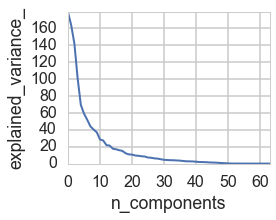

In [5]:
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

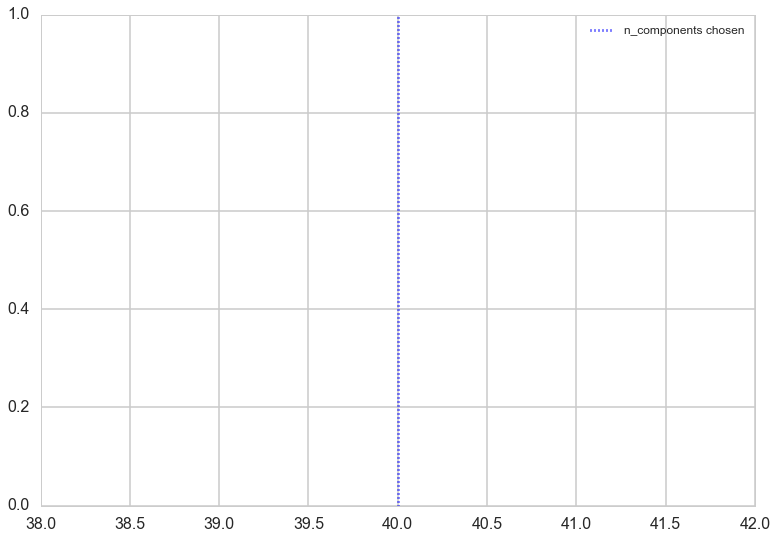

In [6]:
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [8]:
lambda

SyntaxError: invalid syntax (<ipython-input-8-8c8a4646591e>, line 1)